# Introduction to DBSCAN Clustering and Wholesale Customers Dataset


## Overview of DBSCAN Clustering
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) represents a paradigm shift in clustering algorithms, focusing on the identification of high-density areas and the treatment of low-density regions as noise. This technique stands apart from centroid-based clustering methods like K-means by not requiring the number of clusters to be defined a priori. DBSCAN works on the principle of identifying 'core' points with many nearby neighbors and linking points that are not too far from core points into clusters, while marking points in low-density regions as outliers. This makes DBSCAN exceptionally adept at handling irregularly shaped data and robust to outliers, making it a preferred choice for real-world data clustering tasks where anomalies are common.

DBSCAN's unique approach to clustering is based on two key parameters: `eps`, which defines the radius around each data point to search for neighboring points, and `min_samples`, which determines the minimum number of neighbors a point must have within its `eps` radius to be considered a core point. The interplay of these parameters allows DBSCAN to adapt to the specific density characteristics of the dataset, providing flexible and insightful clustering.

## Dataset Overview: Wholesale Customers Data
The Wholesale Customers dataset offers a fascinating glimpse into the purchasing habits of clients of a wholesale distributor. It includes various features like annual spending on diverse product categories such as Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen. This dataset is particularly intriguing for clustering because it encapsulates complex, multidimensional purchasing behaviors of different customers, making it ripe for segmentation analysis.

Using DBSCAN on the Wholesale Customers dataset allows for the discovery of naturally occurring customer groups based on their purchasing patterns. This is particularly beneficial in identifying not just the main customer segments but also anomalous cases - such as outlier customers with unique purchasing behaviors that do not conform to the typical customer profiles. Understanding these segments and outliers can be invaluable for a wholesale distributor in tailoring their marketing strategies, optimizing inventory management, and providing personalized services to meet the diverse needs of their customers.

In this notebook, we will first preprocess the dataset to ensure it is apt for clustering, which includes handling any missing values and scaling the features to normalize the data. We then apply DBSCAN to identify clusters and analyze these clusters to extract meaningful insights about customer purchasing behaviors. Visualizations like scatter plots and box plots will be employed to illustrate the clustering results, offering an intuitive understanding of the customer segments and their defining characteristics. Through this analysis, we aim to uncover the hidden patterns in the wholesale customers' data, providing actionable insights that could be leveraged for strategic decision-making.

###1. Load the Dataset
This step involves loading the "Wholesale customers" dataset into a pandas DataFrame, which is essential for data analysis tasks.

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Wholesale customers data.csv')

### 2. Data Preprocessing
Preprocessing is crucial for ensuring data quality. This step involves checking for and handling any missing values in the dataset.

In [5]:
# Check and handle missing values
if df.isnull().any().any():
    df.dropna(inplace=True)

### 3. Feature Scaling
Feature scaling standardizes the range of continuous variables, which is particularly important for clustering algorithms like DBSCAN that rely on distance measures.

In [6]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### 4. Applying DBSCAN Clustering
DBSCAN is applied to the scaled data. This clustering algorithm groups data points that are closely packed together and marks outliers as noise.

In [7]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

5. DBSCAN Clustering Labeling and Analysis
This step involves assigning the cluster labels obtained from DBSCAN to the original DataFrame for further analysis.

In [8]:
# Labeling and Analysis
df['DBSCAN_Cluster'] = dbscan_labels

6. Generating Plots for DBSCAN Cluster Analysis
Visualizations are generated to provide insights into the clustering. The scatter plots and pair plots help visualize the distribution and separation of clusters.

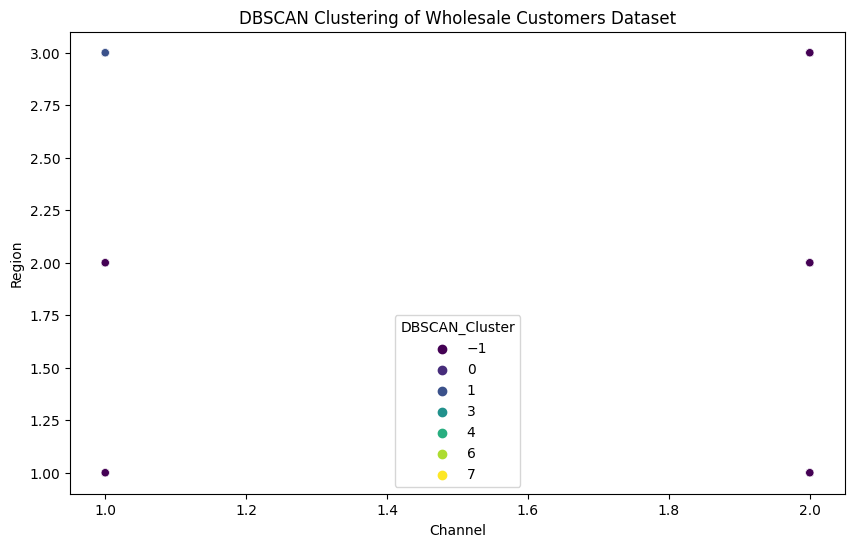

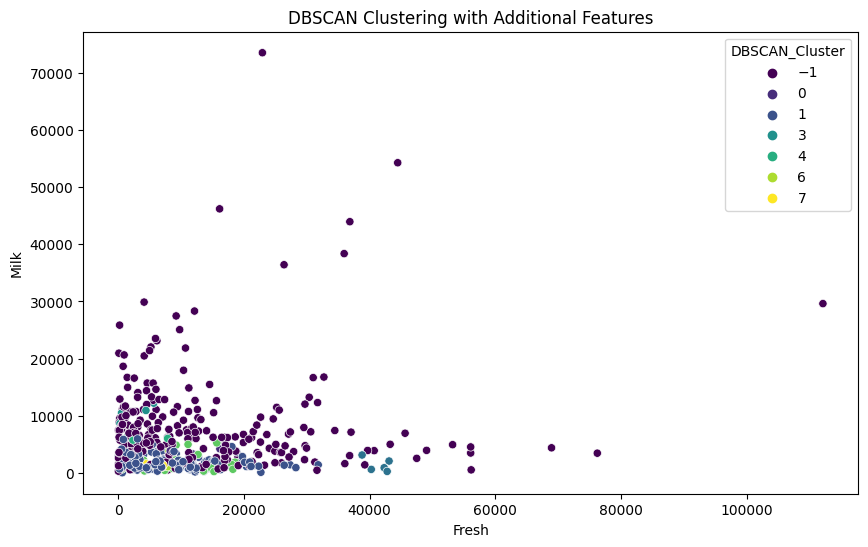

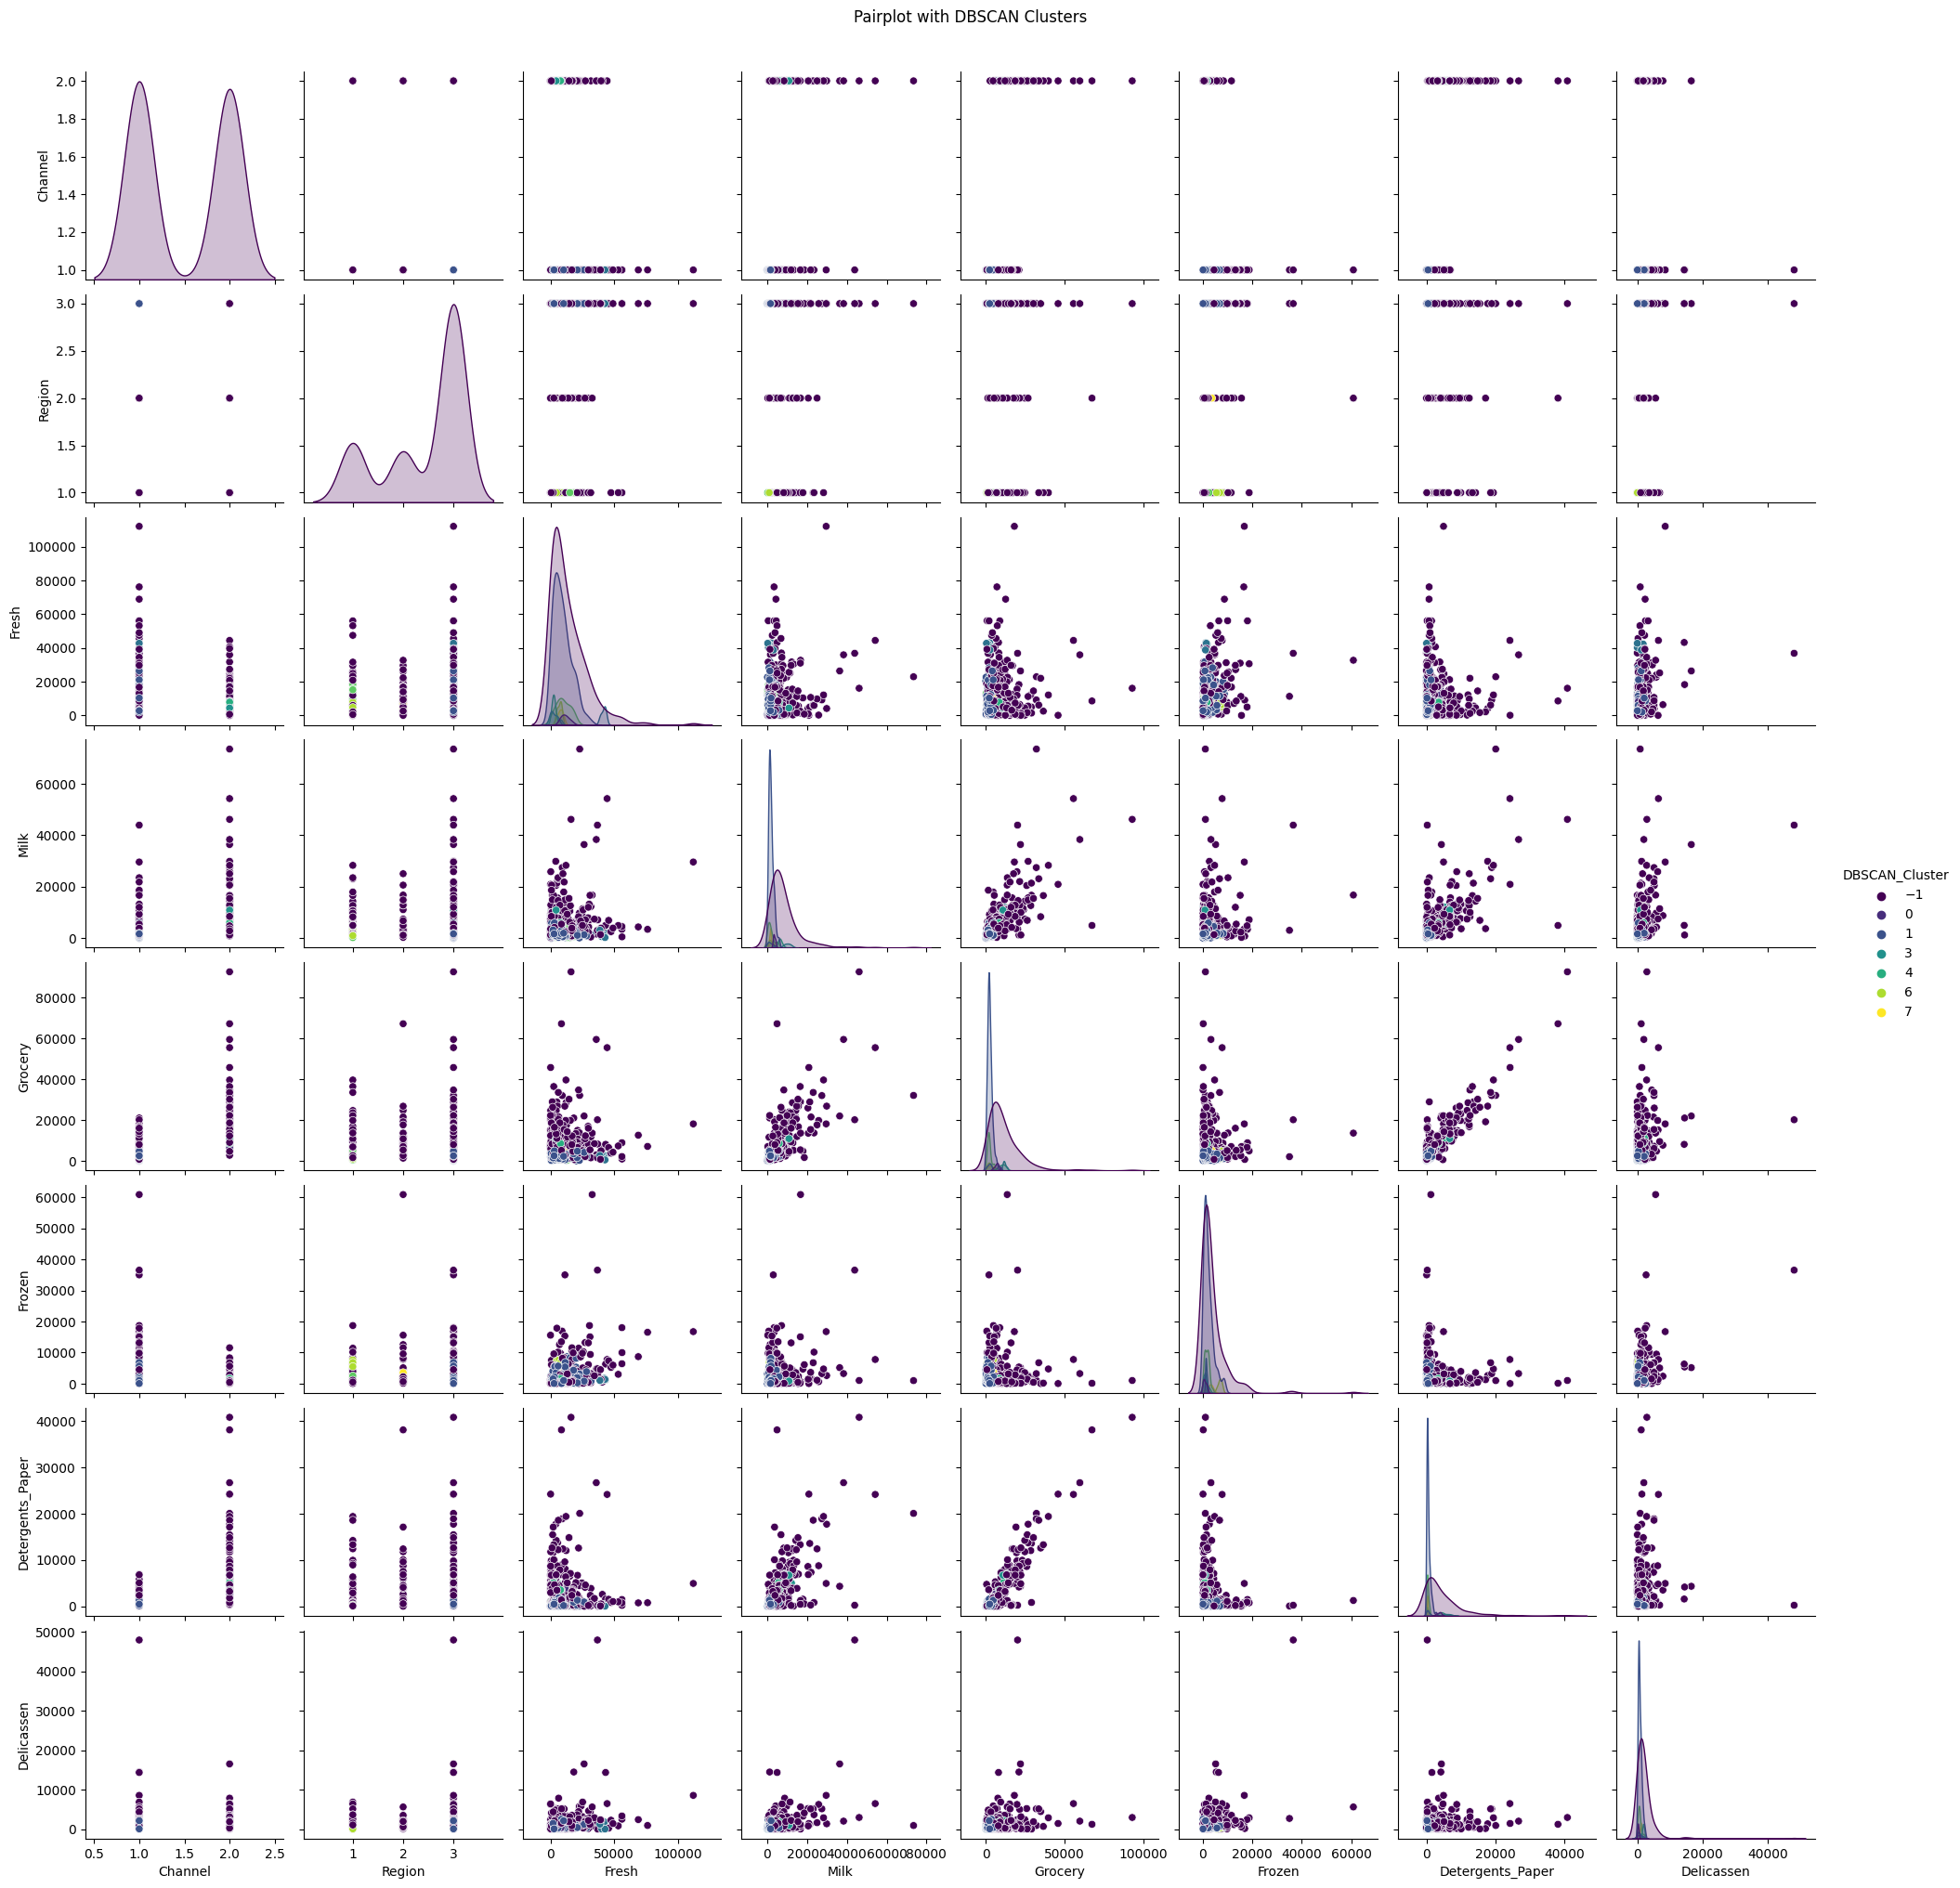

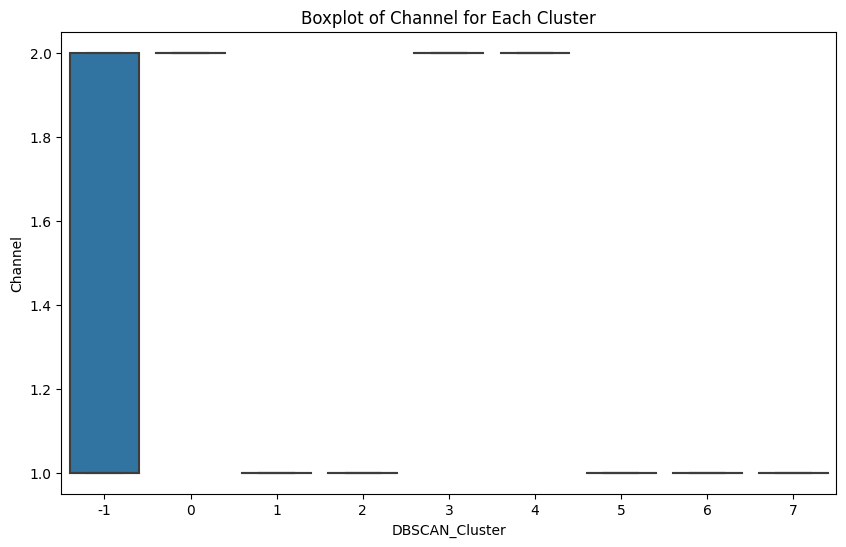

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# First plot: Scatter plot of the first two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering of Wholesale Customers Dataset')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()
print()
# Second plot: Scatter plot of the next two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 2], y=df.iloc[:, 3], hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering with Additional Features')
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])
plt.show()
print()
# Third plot: Pairplot for the entire dataset with DBSCAN cluster hue
sns.pairplot(df, hue='DBSCAN_Cluster', palette='viridis')
plt.suptitle('Pairplot with DBSCAN Clusters', y=1.02)
plt.show()
print()
# Fourth plot: Boxplot for a specific feature across different clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='DBSCAN_Cluster', y=df.columns[0], data=df)
plt.title(f'Boxplot of {df.columns[0]} for Each Cluster')
plt.show()

7. Display Cluster Analysis
The final step provides an overview of each cluster's characteristics, aiding in the interpretation of the DBSCAN clustering results.

In [10]:
# Cluster Analysis
cluster_analysis = df.groupby('DBSCAN_Cluster').mean()
cluster_analysis

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
DBSCAN_Cluster,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000
